In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('C:/Users/ACER/Downloads/Big_martsales.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df.shape

(8523, 12)

In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
(df==0).sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [5]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [7]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF', 'low fat'], 'Low Fat')

In [9]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


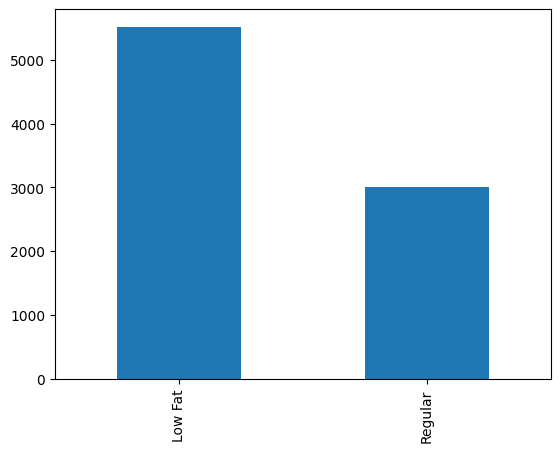

In [10]:
df['Item_Fat_Content'].value_counts().plot.bar()
print(df['Item_Fat_Content'].value_counts())

In [11]:
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [12]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [13]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [14]:
df['Outlet_Establishment_Year'] = 2023 - df['Outlet_Establishment_Year']

In [15]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,24,Medium,Tier 1,Supermarket Type1,3735.138


In [16]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [17]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [18]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [19]:
df1 = df.copy()

In [20]:
#here we are writing fucntion to extrac the categories of Food,Drink & Non_consumable as FD,DR,NC
def fix_item_iden(x):
     return x[:2]


fix_item_iden('NCD19')

'NC'

In [21]:
df1['Item_Identifier'] = df1['Item_Identifier'].apply(fix_item_iden)

In [22]:
#df1['Item_Identifier']  = df1['Item_Identifier'].astype(str).str[:2]

In [23]:
df1['Item_Identifier'] 

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [24]:
df1.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,14,Medium,Tier 3,Supermarket Type2,443.4228


In [25]:
#here we Write a fucntion for to extract the Numerical data from to a string form into INteger 
def fix_indentifier(x):
    return int(x[4:])
fix_indentifier('OUT049')

49

In [26]:
df1['Outlet_Identifier'] = df1['Outlet_Identifier'].apply(fix_indentifier)

In [27]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,49,24,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,18,14,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,49,24,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,10,25,NaN,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,13,36,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [29]:
df1['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [30]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

# Filling Null values by Statistical analysis

In [31]:
dfi0 = df1[df1['Item_Weight'].isnull()]


In [32]:
dfi0.shape

(1463, 12)

In [33]:
dfi1 = df1[~df1['Item_Weight'].isnull()]
dfi1.shape

(7060, 12)

In [34]:
df1.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DR    12.072348
FD    12.832186
NC    13.354532
Name: Item_Weight, dtype: float64

In [35]:
df1.groupby('Item_Fat_Content')['Item_Weight'].mean()

Item_Fat_Content
Low Fat    12.937387
Regular    12.711654
Name: Item_Weight, dtype: float64

In [36]:
avg_it_wt = df1.groupby('Item_Type')['Item_Weight'].mean()
avg_it_wt

Item_Type
Baking Goods             12.277108
Breads                   11.346936
Breakfast                12.768202
Canned                   12.305705
Dairy                    13.426069
Frozen Foods             12.867061
Fruits and Vegetables    13.224769
Hard Drinks              11.400328
Health and Hygiene       13.142314
Household                13.384736
Meat                     12.817344
Others                   13.853285
Seafood                  12.552843
Snack Foods              12.987880
Soft Drinks              11.847460
Starchy Foods            13.690731
Name: Item_Weight, dtype: float64

In [37]:
def fix_item_weight(x):
    return round(avg_it_wt[x],3)
fix_item_weight('Frozen Foods')

12.867

In [38]:
dfi0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FD,NaN,Low Fat,0.127470,Snack Foods,107.7622,27,38,Medium,Tier 3,Supermarket Type3,4022.7636
18,DR,NaN,Low Fat,0.034238,Hard Drinks,113.2834,27,38,Medium,Tier 3,Supermarket Type3,2303.6680
21,FD,NaN,Regular,0.035400,Baking Goods,144.5444,27,38,Medium,Tier 3,Supermarket Type3,4064.0432
23,FD,NaN,Low Fat,0.057557,Baking Goods,107.6938,19,38,Small,Tier 1,Grocery Store,214.3876
29,FD,NaN,Regular,0.072222,Canned,43.6454,19,38,Small,Tier 1,Grocery Store,125.8362


In [39]:
dfi0['Item_Weight'] = dfi0['Item_Type'].apply(fix_item_weight)
dfi0.head()

C:\Users\ACER\AppData\Local\Temp\ipykernel_6320\3346343985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfi0['Item_Weight'] = dfi0['Item_Type'].apply(fix_item_weight)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FD,12.988,Low Fat,0.127470,Snack Foods,107.7622,27,38,Medium,Tier 3,Supermarket Type3,4022.7636
18,DR,11.400,Low Fat,0.034238,Hard Drinks,113.2834,27,38,Medium,Tier 3,Supermarket Type3,2303.6680
21,FD,12.277,Regular,0.035400,Baking Goods,144.5444,27,38,Medium,Tier 3,Supermarket Type3,4064.0432
23,FD,12.277,Low Fat,0.057557,Baking Goods,107.6938,19,38,Small,Tier 1,Grocery Store,214.3876
29,FD,12.306,Regular,0.072222,Canned,43.6454,19,38,Small,Tier 1,Grocery Store,125.8362


In [40]:
#After seperating null values and filling with mean by applying a function, adding the the two seperated data frames in a New dataframe 'Df2'
df2 = pd.concat((dfi0,dfi1))
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FD,12.988,Low Fat,0.127470,Snack Foods,107.7622,27,38,Medium,Tier 3,Supermarket Type3,4022.7636
18,DR,11.400,Low Fat,0.034238,Hard Drinks,113.2834,27,38,Medium,Tier 3,Supermarket Type3,2303.6680
21,FD,12.277,Regular,0.035400,Baking Goods,144.5444,27,38,Medium,Tier 3,Supermarket Type3,4064.0432
23,FD,12.277,Low Fat,0.057557,Baking Goods,107.6938,19,38,Small,Tier 1,Grocery Store,214.3876
29,FD,12.306,Regular,0.072222,Canned,43.6454,19,38,Small,Tier 1,Grocery Store,125.8362


In [41]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [42]:
df2.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [43]:
df3 = df2.copy()

In [44]:
df3.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FD,12.988,Low Fat,0.127470,Snack Foods,107.7622,27,38,Medium,Tier 3,Supermarket Type3,4022.7636
18,DR,11.400,Low Fat,0.034238,Hard Drinks,113.2834,27,38,Medium,Tier 3,Supermarket Type3,2303.6680
21,FD,12.277,Regular,0.035400,Baking Goods,144.5444,27,38,Medium,Tier 3,Supermarket Type3,4064.0432
23,FD,12.277,Low Fat,0.057557,Baking Goods,107.6938,19,38,Small,Tier 1,Grocery Store,214.3876
29,FD,12.306,Regular,0.072222,Canned,43.6454,19,38,Small,Tier 1,Grocery Store,125.8362


In [45]:
df3['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

*  an item which is non - consumeble can't have low fat content


In [46]:
dfnc = df3[df3['Item_Identifier'] == 'NC']
dfnc

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
83,NC,13.385,Low Fat,0.293418,Household,194.6136,19,38,Small,Tier 1,Grocery Store,583.2408
98,NC,13.385,Low Fat,0.028460,Household,149.9708,27,38,Medium,Tier 3,Supermarket Type3,4363.6532
132,NC,13.142,Low Fat,0.144338,Health and Hygiene,224.4404,27,38,Medium,Tier 3,Supermarket Type3,6976.2524
168,NC,13.385,Low Fat,0.025579,Household,198.8084,27,38,Medium,Tier 3,Supermarket Type3,5555.4352
182,NC,13.142,Low Fat,0.128478,Health and Hygiene,117.9440,19,38,Small,Tier 1,Grocery Store,239.6880
...,...,...,...,...,...,...,...,...,...,...,...,...
8499,NC,11.600,Low Fat,0.037574,Health and Hygiene,100.0042,35,19,Small,Tier 2,Supermarket Type1,2976.1260
8500,NC,20.350,Low Fat,0.000000,Household,125.1678,17,16,NaN,Tier 2,Supermarket Type1,1907.5170
8502,NC,8.420,Low Fat,0.070712,Household,216.4192,45,21,NaN,Tier 2,Supermarket Type1,3020.0688
8516,NC,18.600,Low Fat,0.118661,Others,58.7588,18,14,Medium,Tier 3,Supermarket Type2,858.8820


In [47]:
dfdr = df3[df3['Item_Identifier'] != 'NC']
dfdr 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FD,12.988,Low Fat,0.127470,Snack Foods,107.7622,27,38,Medium,Tier 3,Supermarket Type3,4022.7636
18,DR,11.400,Low Fat,0.034238,Hard Drinks,113.2834,27,38,Medium,Tier 3,Supermarket Type3,2303.6680
21,FD,12.277,Regular,0.035400,Baking Goods,144.5444,27,38,Medium,Tier 3,Supermarket Type3,4064.0432
23,FD,12.277,Low Fat,0.057557,Baking Goods,107.6938,19,38,Small,Tier 1,Grocery Store,214.3876
29,FD,12.306,Regular,0.072222,Canned,43.6454,19,38,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,FD,20.750,Regular,0.083607,Frozen Foods,178.8318,46,26,Small,Tier 1,Supermarket Type1,3608.6360
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,13,36,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular,0.046982,Baking Goods,108.1570,45,21,NaN,Tier 2,Supermarket Type1,549.2850
8521,FD,7.210,Regular,0.145221,Snack Foods,103.1332,18,14,Medium,Tier 3,Supermarket Type2,1845.5976


In [48]:
dfnc['Item_Fat_Content'] = dfnc['Item_Fat_Content'].str.replace('Low Fat','nc')

C:\Users\ACER\AppData\Local\Temp\ipykernel_6320\4288170009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnc['Item_Fat_Content'] = dfnc['Item_Fat_Content'].str.replace('Low Fat','nc')


In [49]:
dfnc.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
83,NC,13.385,nc,0.293418,Household,194.6136,19,38,Small,Tier 1,Grocery Store,583.2408
98,NC,13.385,nc,0.028460,Household,149.9708,27,38,Medium,Tier 3,Supermarket Type3,4363.6532
132,NC,13.142,nc,0.144338,Health and Hygiene,224.4404,27,38,Medium,Tier 3,Supermarket Type3,6976.2524
168,NC,13.385,nc,0.025579,Household,198.8084,27,38,Medium,Tier 3,Supermarket Type3,5555.4352
182,NC,13.142,nc,0.128478,Health and Hygiene,117.9440,19,38,Small,Tier 1,Grocery Store,239.6880


In [50]:
#dfnc,dfdr
df4 = pd.concat((dfnc,dfdr))
df4.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
83,NC,13.385,nc,0.293418,Household,194.6136,19,38,Small,Tier 1,Grocery Store,583.2408
98,NC,13.385,nc,0.028460,Household,149.9708,27,38,Medium,Tier 3,Supermarket Type3,4363.6532
132,NC,13.142,nc,0.144338,Health and Hygiene,224.4404,27,38,Medium,Tier 3,Supermarket Type3,6976.2524
168,NC,13.385,nc,0.025579,Household,198.8084,27,38,Medium,Tier 3,Supermarket Type3,5555.4352
182,NC,13.142,nc,0.128478,Health and Hygiene,117.9440,19,38,Small,Tier 1,Grocery Store,239.6880


In [51]:
df4['Outlet_Size'].isnull().sum()

2410

In [52]:
#df4['Outlet_Size'] = df4['Outlet_Size'].fillna(method='bfill')

In [53]:
df4.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [54]:
df4.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

In [55]:
df4.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [56]:
df4s0 = df4[df4['Outlet_Size'].isnull()]
df4s1 = df4[~df4['Outlet_Size'].isnull()]

In [57]:
df4s0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
25,NC,13.000,nc,0.099887,Household,45.9060,17,16,NaN,Tier 2,Supermarket Type1,838.9080
46,NC,19.600,nc,0.000000,Health and Hygiene,153.3024,45,21,NaN,Tier 2,Supermarket Type1,2428.8384
54,NC,12.150,nc,0.028760,Household,151.4708,17,16,NaN,Tier 2,Supermarket Type1,4815.0656
56,NC,9.195,nc,0.048157,Household,106.1622,45,21,NaN,Tier 2,Supermarket Type1,2117.2440
120,NC,13.000,nc,0.035307,Household,47.5034,17,16,NaN,Tier 2,Supermarket Type1,680.4476


In [58]:
def fix_outlet_size(x):
    if x in ['Grocery Store','Supermarket Type1']:
        return 'Small'
    else:
        return 'Medium'

fix_outlet_size('Grocery Store')

'Small'

In [59]:
df4s0['Outlet_Size'] = df4s0['Outlet_Type'].apply(fix_outlet_size)

C:\Users\ACER\AppData\Local\Temp\ipykernel_6320\4083006174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4s0['Outlet_Size'] = df4s0['Outlet_Type'].apply(fix_outlet_size)


In [60]:
#df4s0,df4s1
df45 = pd.concat((df4s0,df4s1))
df45.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
25,NC,13.000,nc,0.099887,Household,45.9060,17,16,Small,Tier 2,Supermarket Type1,838.9080
46,NC,19.600,nc,0.000000,Health and Hygiene,153.3024,45,21,Small,Tier 2,Supermarket Type1,2428.8384
54,NC,12.150,nc,0.028760,Household,151.4708,17,16,Small,Tier 2,Supermarket Type1,4815.0656
56,NC,9.195,nc,0.048157,Household,106.1622,45,21,Small,Tier 2,Supermarket Type1,2117.2440
120,NC,13.000,nc,0.035307,Household,47.5034,17,16,Small,Tier 2,Supermarket Type1,680.4476


In [61]:
#df5.isna().sum()

In [62]:
#Dealing with outliers 
#m = df5['Item_Visibility'].mean()
#s = df5['Item_Visibility'].std()
#df5 = df5[(df5['Item_Visibility'] <= m + 2 * s) & (df5['Item_Visibility'] >= m - 2 * s)]

In [63]:
mn_sales = df45['Item_Visibility'].mean()
print(mn_sales)
sd_sales = df45['Item_Visibility'].std()
print(sd_sales)

0.06613202877895107
0.05159782232113511


In [64]:
z_score  = (df45['Item_Visibility'] - mn_sales)/sd_sales

In [65]:
#df1[(z_score < -1) & (z_score > 1)]

In [66]:
df5 = df45[(z_score > -2) & (z_score < 2)]


In [67]:
df5.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
25,NC,13.000,nc,0.099887,Household,45.9060,17,16,Small,Tier 2,Supermarket Type1,838.9080
46,NC,19.600,nc,0.000000,Health and Hygiene,153.3024,45,21,Small,Tier 2,Supermarket Type1,2428.8384
54,NC,12.150,nc,0.028760,Household,151.4708,17,16,Small,Tier 2,Supermarket Type1,4815.0656
56,NC,9.195,nc,0.048157,Household,106.1622,45,21,Small,Tier 2,Supermarket Type1,2117.2440
120,NC,13.000,nc,0.035307,Household,47.5034,17,16,Small,Tier 2,Supermarket Type1,680.4476


<Axes: xlabel='Item_Outlet_Sales'>

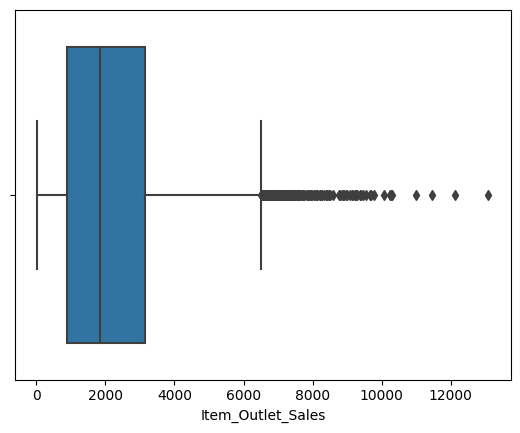

In [68]:
sns.boxplot(x= df5['Item_Outlet_Sales'])

<Axes: xlabel='Item_Visibility'>

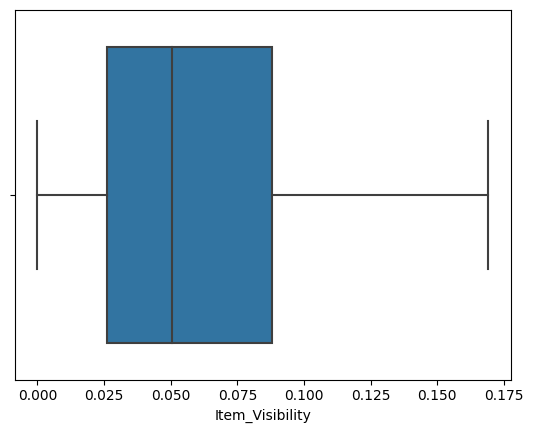

In [69]:
sns.boxplot(x= df5['Item_Visibility'])

<Axes: >

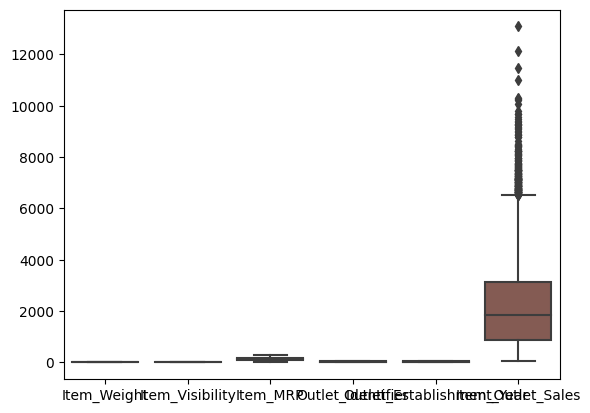

In [70]:
sns.boxplot(df5)

In [71]:
df5.shape

(8155, 12)

Small     0.552544
Medium    0.335254
High      0.112201
Name: Outlet_Size, dtype: float64


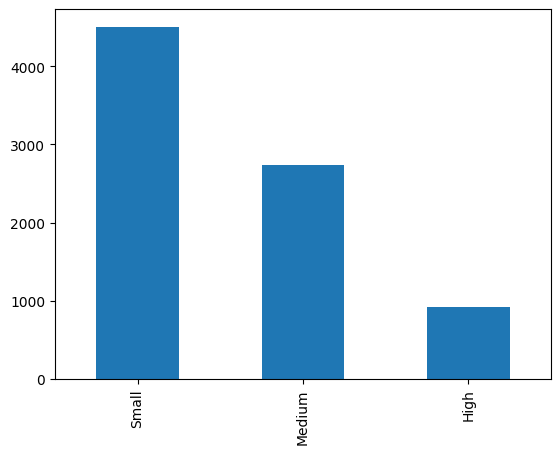

In [72]:
df5['Outlet_Size'].value_counts().plot.bar()
print(df5['Outlet_Size'].value_counts(normalize = True))

In [73]:
print(df['Item_Outlet_Sales'].mean())
print(df['Item_Outlet_Sales'].median())
print('**************')
print(df5['Item_Outlet_Sales'].mean())
print(df5['Item_Outlet_Sales'].median())

2181.288913575032
1794.331
**************
2226.4111152667074
1842.9344


In [74]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8155 entries, 25 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8155 non-null   object 
 1   Item_Weight                8155 non-null   float64
 2   Item_Fat_Content           8155 non-null   object 
 3   Item_Visibility            8155 non-null   float64
 4   Item_Type                  8155 non-null   object 
 5   Item_MRP                   8155 non-null   float64
 6   Outlet_Identifier          8155 non-null   int64  
 7   Outlet_Establishment_Year  8155 non-null   int64  
 8   Outlet_Size                8155 non-null   object 
 9   Outlet_Location_Type       8155 non-null   object 
 10  Outlet_Type                8155 non-null   object 
 11  Item_Outlet_Sales          8155 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 828.2+ KB


In [75]:
df5.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<Axes: >

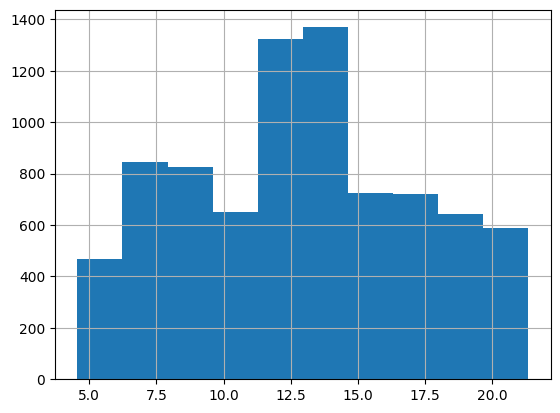

In [76]:
df5['Item_Weight'].hist()

<Axes: >

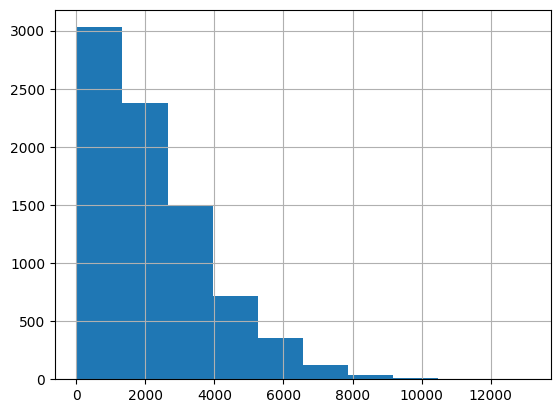

In [77]:
df5['Item_Outlet_Sales'].hist()

<Axes: >

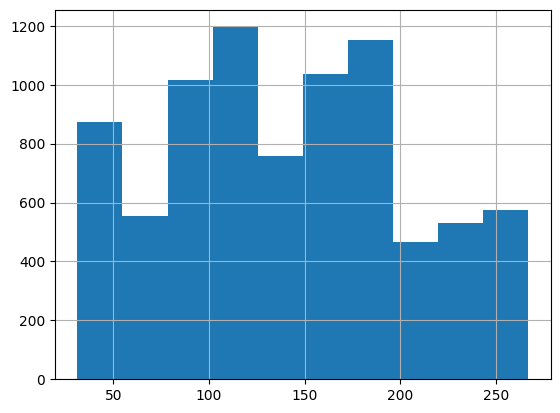

In [78]:
df5['Item_MRP'].hist()

<Axes: >

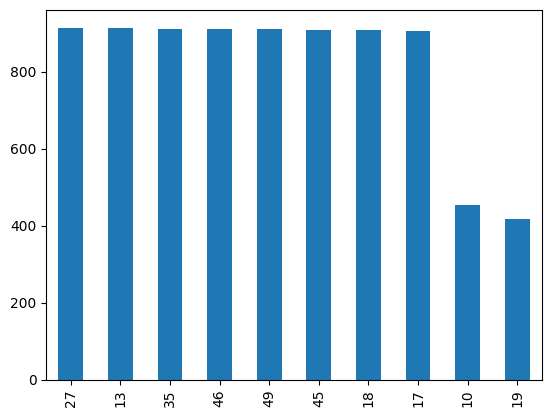

In [79]:
df5['Outlet_Identifier'].value_counts().plot.bar()

([<matplotlib.patches.Wedge at 0x1b9563449d0>,
 [Text(-0.6934317732293542, 0.8539041959587701, 'NC'),
  Text(0.41472870767008635, -1.0188228987583172, 'FD'),
  Text(1.052330177148093, -0.3203142180164089, 'DR')],
 [Text(-0.37823551267055683, 0.46576592506842, '71.71%'),
  Text(0.22621565872913799, -0.5557215811409002, '18.88%'),
  Text(0.5739982784444143, -0.17471684619076847, '9.41%')])

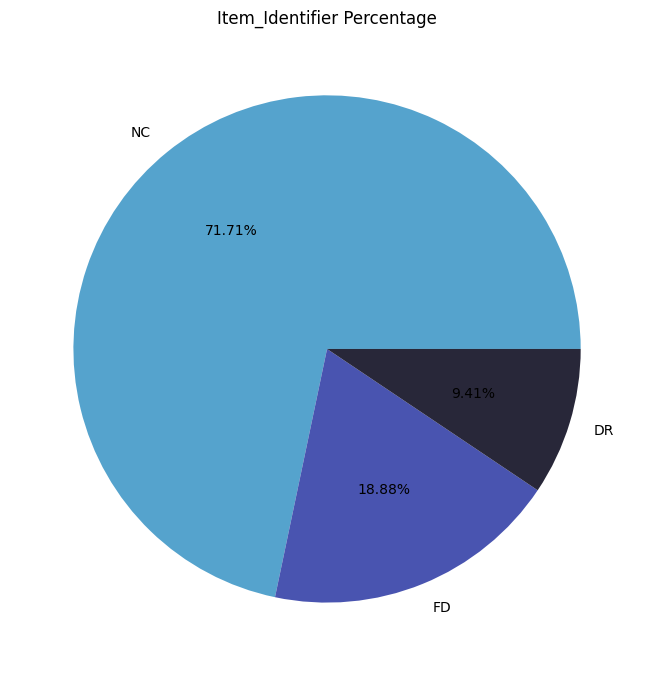

In [80]:
colors=sns.color_palette('icefire')
labels=df5['Item_Identifier'].unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Item_Identifier Percentage')
plt.pie(df5['Item_Identifier'].value_counts(), labels=labels,   colors=colors,  autopct='%.2f%%')



Low Fat    3738
Regular    2877
nc         1540
Name: Item_Fat_Content, dtype: int64

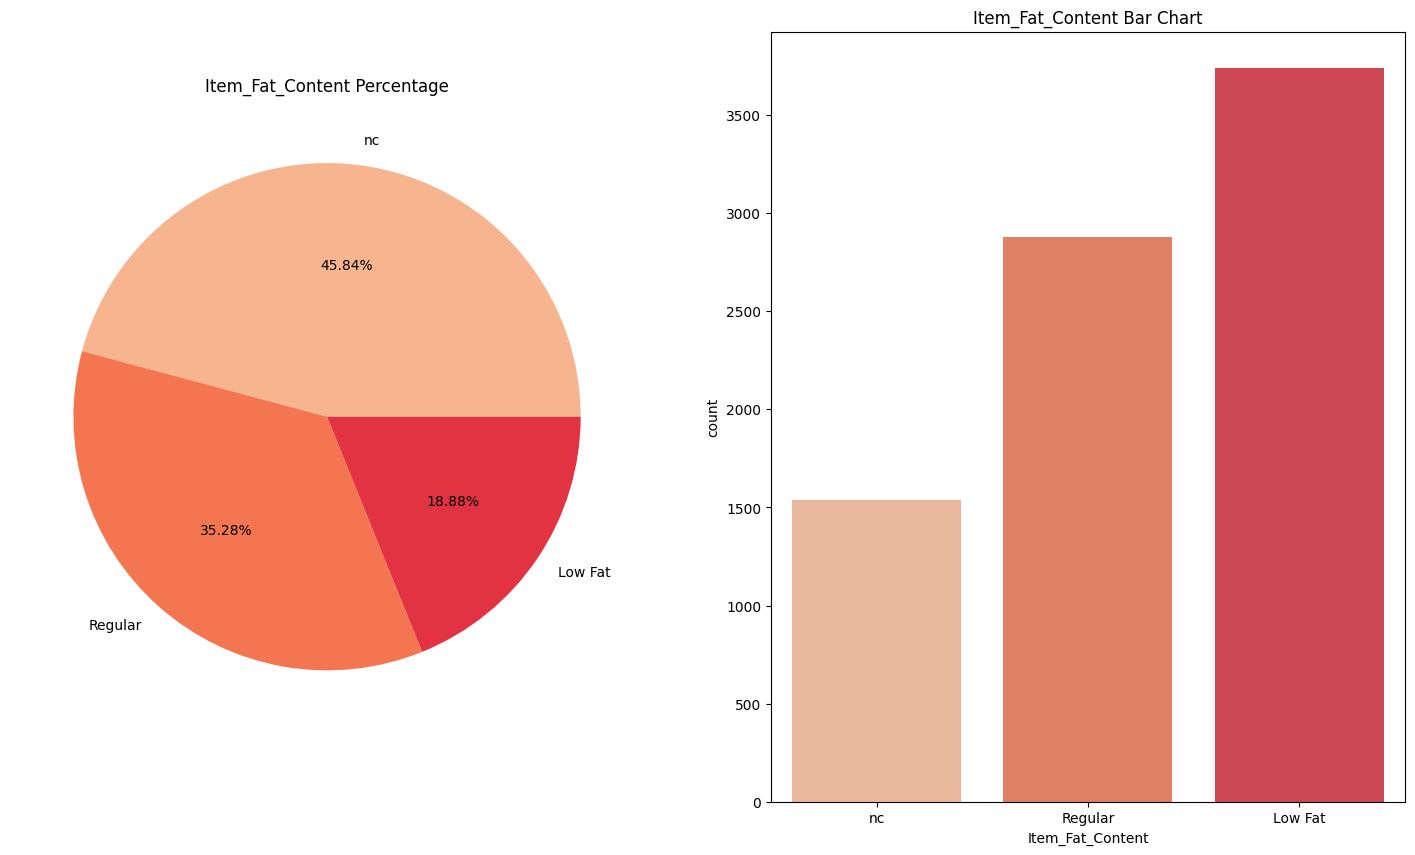

In [81]:
colors=sns.color_palette('rocket_r')
labels=df5['Item_Fat_Content'].unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Item_Fat_Content Percentage')
plt.pie(df5['Item_Fat_Content'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Item_Fat_Content Bar Chart')
sns.countplot(x="Item_Fat_Content", data=df5, palette=colors)

df5.Item_Fat_Content.value_counts()

## By this above Pic chart vizualisation we can see that Non-consumable Items are 45.84% are present in the when compared to other fat content items and in the bar chart we can see Low fat content is count is more than 3000

Fruits and Vegetables    1167
Snack Foods              1152
Household                 871
Frozen Foods              839
Dairy                     641
Canned                    615
Baking Goods              609
Health and Hygiene        508
Soft Drinks               424
Meat                      405
Breads                    246
Hard Drinks               207
Others                    161
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

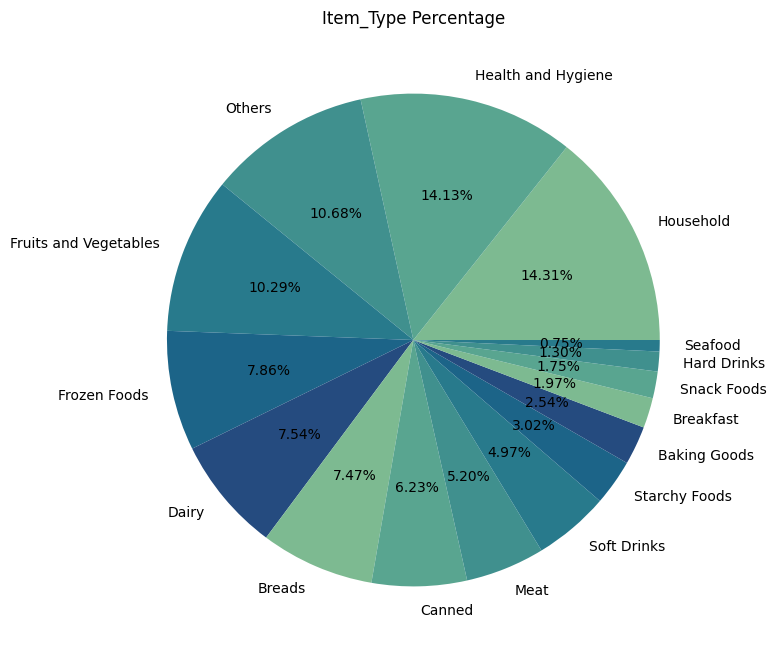

In [82]:
colors=sns.color_palette('crest')
labels=df5['Item_Type'].unique()

plt.figure(figsize=(10,8))
plt.title('Item_Type Percentage')
plt.pie(df5['Item_Type'].value_counts(), 
        labels=labels, 
        colors=colors, 
        autopct='%.2f%%')

df5.Item_Type.value_counts()

## health and hygene and household products are 14.31%  are present other products are less than this both in the item type 

Fruits and Vegetables    1167
Snack Foods              1152
Household                 871
Frozen Foods              839
Dairy                     641
Canned                    615
Baking Goods              609
Health and Hygiene        508
Soft Drinks               424
Meat                      405
Breads                    246
Hard Drinks               207
Others                    161
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64


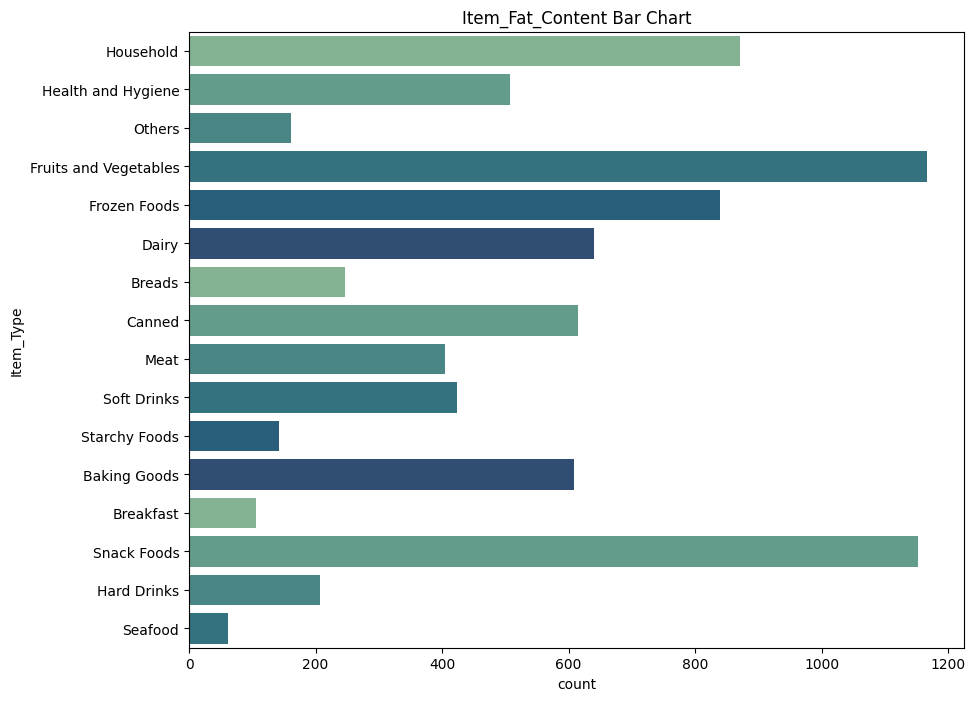

In [83]:
plt.figure(figsize=(10,8))
plt.title('Item_Fat_Content Bar Chart')
sns.countplot(y="Item_Type", data=df5, palette=colors);
print(df5['Item_Type'].value_counts())

Small     4506
Medium    2734
High       915
Name: Outlet_Size, dtype: int64

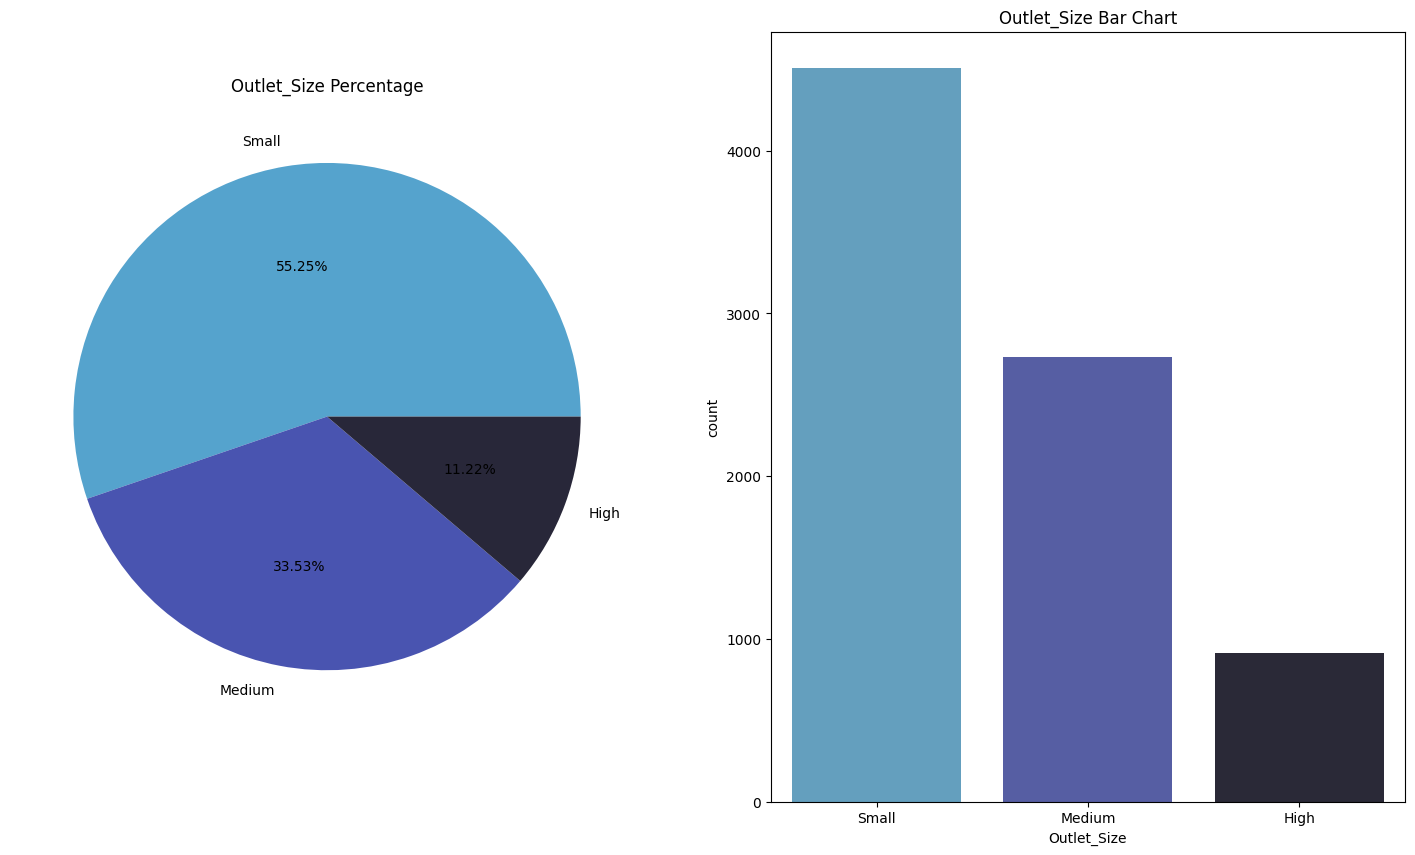

In [84]:
colors=sns.color_palette('icefire')
labels=df5['Outlet_Size'].unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Size Percentage')
plt.pie(df5['Outlet_Size'].value_counts(), labels=labels,   colors=colors,  autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Size Bar Chart')
sns.countplot(x="Outlet_Size", data=df5, palette=colors)

df5.Outlet_Size.value_counts()

Tier 3    3193
Tier 2    2725
Tier 1    2237
Name: Outlet_Location_Type, dtype: int64

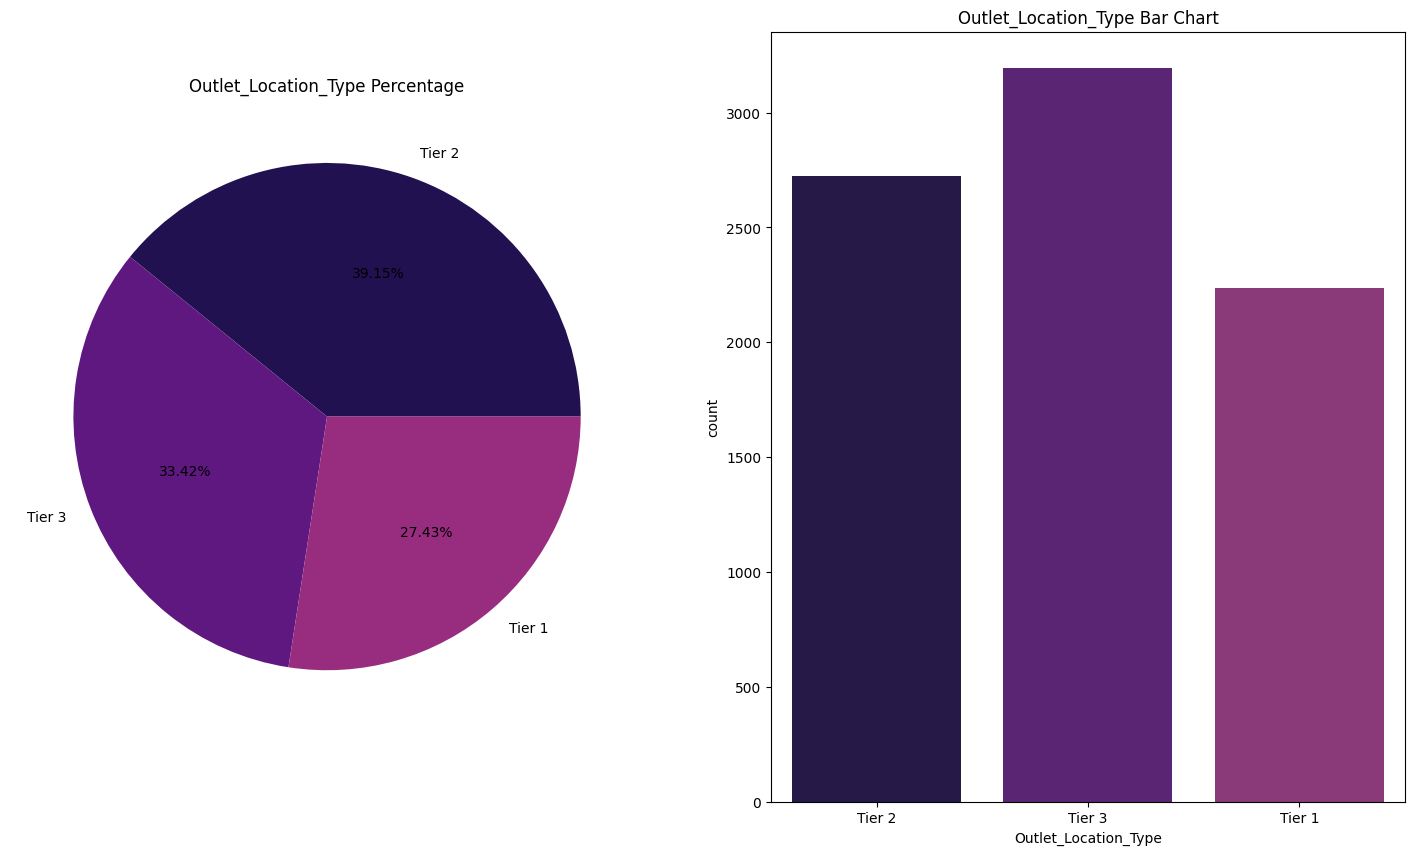

In [85]:
colors=sns.color_palette('magma')
labels=df5['Outlet_Location_Type'].unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Location_Type Percentage')
plt.pie(df5['Outlet_Location_Type'].value_counts()  , labels=labels,  colors=colors,   autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Location_Type Bar Chart')
sns.countplot(x="Outlet_Location_Type", data=df5, palette=colors)

df5.Outlet_Location_Type.value_counts()

Supermarket Type1    5461
Supermarket Type3     915
Supermarket Type2     909
Grocery Store         870
Name: Outlet_Type, dtype: int64

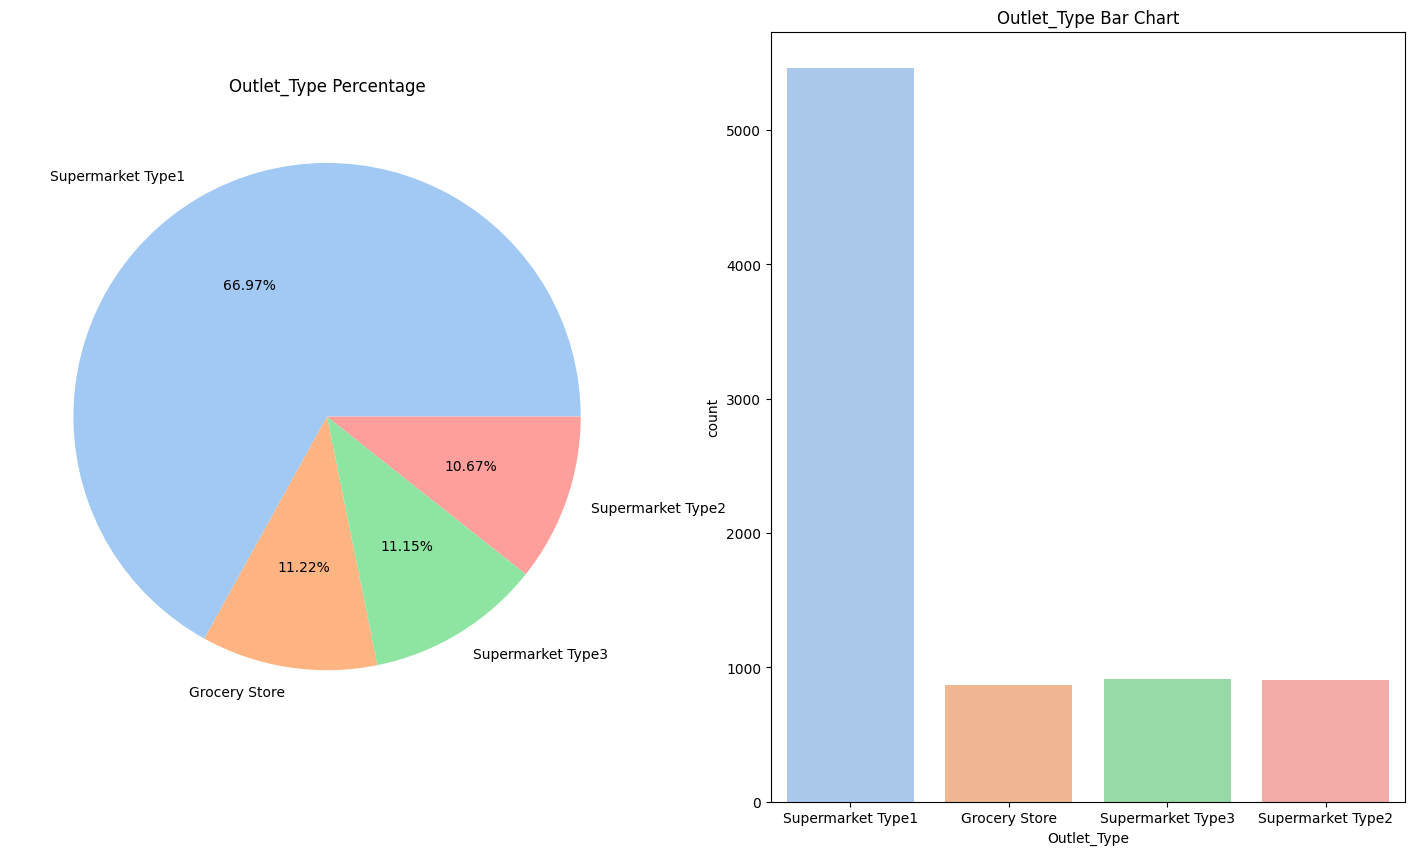

In [86]:
colors=sns.color_palette('pastel')
labels=df5['Outlet_Type'].unique()

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.title('Outlet_Type Percentage')
plt.pie(df5['Outlet_Type'].value_counts(),  labels=labels, colors=colors,  autopct='%.2f%%')

plt.subplot(1,2,2)
plt.title('Outlet_Type Bar Chart')
sns.countplot(x="Outlet_Type", data=df5, palette=colors)

df5.Outlet_Type.value_counts()

In [87]:
dfii = pd.get_dummies(df5['Item_Identifier'])
dfif = pd.get_dummies(df5['Item_Fat_Content'])
dfit = pd.get_dummies(df5['Item_Type'])
dfos = pd.get_dummies(df5['Outlet_Size'])
dfolt = pd.get_dummies(df5['Outlet_Location_Type'])
dfot = pd.get_dummies(df5['Outlet_Type'])

In [88]:
dfot

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
25,0,1,0,0
46,0,1,0,0
54,0,1,0,0
56,0,1,0,0
120,0,1,0,0
...,...,...,...,...
8515,0,0,1,0
8517,0,1,0,0
8518,0,1,0,0
8521,0,0,1,0


In [89]:
df6 = pd.concat((df5,dfii,dfif,dfit,dfos,dfolt,dfot) , axis = 1)
df6.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
25,NC,13.000,nc,0.099887,Household,45.9060,17,16,Small,Tier 2,...,0,0,1,0,1,0,0,1,0,0
46,NC,19.600,nc,0.000000,Health and Hygiene,153.3024,45,21,Small,Tier 2,...,0,0,1,0,1,0,0,1,0,0
54,NC,12.150,nc,0.028760,Household,151.4708,17,16,Small,Tier 2,...,0,0,1,0,1,0,0,1,0,0
56,NC,9.195,nc,0.048157,Household,106.1622,45,21,Small,Tier 2,...,0,0,1,0,1,0,0,1,0,0
120,NC,13.000,nc,0.035307,Household,47.5034,17,16,Small,Tier 2,...,0,0,1,0,1,0,0,1,0,0


In [90]:
df7 = df6.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'] , axis=1)
df7.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,DR,FD,NC,Low Fat,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
25,13.000,0.099887,45.9060,17,16,838.9080,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
46,19.600,0.000000,153.3024,45,21,2428.8384,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
54,12.150,0.028760,151.4708,17,16,4815.0656,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
56,9.195,0.048157,106.1622,45,21,2117.2440,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
120,13.000,0.035307,47.5034,17,16,680.4476,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0


In [91]:
df7.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,DR,FD,NC,Low Fat,...,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Weight,1.000000,-0.012126,0.023762,-0.011727,0.007813,0.009046,-0.057452,-0.013110,0.057937,-0.020930,...,0.010252,0.003274,-0.009616,0.003852,-0.016426,0.012353,0.009135,-0.006433,0.001757,-0.001101
Item_Visibility,-0.012126,1.000000,0.007977,-0.047512,0.020000,-0.059135,-0.019064,0.073020,-0.069814,-0.001738,...,-0.017353,-0.038006,0.047098,0.023137,-0.023416,0.001480,0.127663,-0.054978,-0.011012,-0.031960
Item_MRP,0.023762,0.007977,1.000000,0.000433,-0.004120,0.578840,-0.051212,0.035637,-0.002816,-0.006877,...,0.003725,-0.006288,0.003606,-0.002390,0.000842,0.001371,-0.000324,0.003096,0.003309,-0.007596
Outlet_Identifier,-0.011727,-0.047512,0.000433,1.000000,-0.132065,0.128529,0.008165,0.005903,-0.012883,0.006767,...,-0.420540,0.096638,0.175185,0.564527,0.148777,-0.659811,-0.376387,0.483995,-0.291551,-0.062399
Outlet_Establishment_Year,0.007813,0.020000,-0.004120,-0.132065,1.000000,0.071276,-0.008988,-0.001833,0.008813,-0.002488,...,0.467880,0.029402,-0.324898,0.177001,-0.538469,0.358579,0.256746,-0.226882,-0.467431,0.553066
Item_Outlet_Sales,0.009046,-0.059135,0.578840,0.128529,0.071276,1.000000,-0.033830,0.037714,-0.018171,-0.008200,...,0.017374,0.189679,-0.191112,-0.100902,0.041333,0.052291,-0.381999,0.077403,-0.047464,0.305622
DR,-0.057452,-0.019064,-0.051212,0.008165,-0.008988,-0.033830,1.000000,-0.512996,-0.155464,0.292919,...,-0.001409,-0.004574,0.005237,0.002452,0.006863,-0.008874,-0.002485,0.011949,-0.004664,-0.010726
FD,-0.013110,0.073020,0.035637,0.005903,-0.001833,0.037714,-0.512996,1.000000,-0.768202,0.195862,...,-0.003582,0.014090,-0.011104,-0.001322,0.001666,-0.000401,-0.016652,0.000512,0.005321,0.010220
NC,0.057937,-0.069814,-0.002816,-0.012883,0.008813,-0.018171,-0.155464,-0.768202,1.000000,-0.443865,...,0.005172,-0.012804,0.008873,-0.000307,-0.007036,0.007080,0.021017,-0.009500,-0.002645,-0.003762
Low Fat,-0.020930,-0.001738,-0.006877,0.006767,-0.002488,-0.008200,0.292919,0.195862,-0.443865,1.000000,...,-0.002657,0.005640,-0.003668,-0.002411,0.005710,-0.003314,-0.006203,0.002536,0.000268,0.002021


In [92]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)




In [93]:
#Seperate features and labels
X = df7.drop('Item_Outlet_Sales' , axis=1)
Y = df7[['Item_Outlet_Sales']]

In [94]:
#Create a Linear Regression model and Evaluate
X.tail()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,DR,FD,NC,Low Fat,Regular,nc,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods,High,Medium,Small,Tier 1,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
8515,20.700,0.021518,157.5288,18,14,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
8517,20.750,0.083607,178.8318,46,26,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0
8518,6.865,0.056783,214.5218,13,36,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
8521,7.210,0.145221,103.1332,18,14,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
8522,14.800,0.044878,75.4670,46,26,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0


In [95]:
Y.tail()

,Item_Outlet_Sales
8515,1571.2880
8517,3608.6360
8518,2778.3834
8521,1845.5976
8522,765.6700


In [96]:
#Split into train and test sets
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(X, Y, train_size=0.80)

In [97]:
from sklearn.linear_model import LinearRegression
lm1 = LinearRegression()
lm1.fit(xtrain,ytrain)

LinearRegression()

In [98]:
print(lm1.coef_)

[[ 8.91492442e-01 -5.27397893e+02  1.58838666e+01  1.28381998e+02
  -7.50276809e+02  1.42649220e+01 -3.78227520e+00 -1.04826468e+01
  -2.97929660e+01  4.02756128e+01 -1.04826468e+01 -2.66467386e+00
   3.74009371e+00 -1.37909637e+02  2.10432089e+01  1.89523087e+01
  -1.60510032e+01  2.26133310e+00 -4.57113698e+01  4.25753789e+01
  -5.10520557e+01  4.57293990e+01 -2.00597001e+00  1.62995284e+02
  -8.44193539e+00  8.51555101e-01 -3.43119162e+01  1.42139246e+04
  -7.98892006e+03 -6.22500451e+03  4.12068999e+03  4.26322016e+02
  -4.54701201e+03  9.24565232e+02 -9.67956452e+03 -4.95307946e+03
   1.37080787e+04]]


In [99]:
ypred_train = lm1.predict(xtrain)
ypred_test = lm1.predict(xtest)

mae_train = abs(ytrain - ypred_train).mean()
print(mae_train)

mae_test = abs(ytest - ypred_test).mean()
print(mae_test)

Item_Outlet_Sales    840.557196
dtype: float64
Item_Outlet_Sales    849.485193
dtype: float64


# Log value of sales

In [100]:
Yt = df7['Item_Outlet_Sales']
Xt = df7.drop('Item_Outlet_Sales' , axis=1)

In [101]:
from math import log

In [102]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(Xt, Yt, train_size=0.80, random_state=14)

ytrain_log = ytrain.apply(log)
ytest_log = ytest.apply(log)

In [103]:
ytrain_log


8411    8.396508
4427    6.823073
5650    7.118874
7195    7.512590
5098    7.457654
6766    8.147145
5985    7.852692
1621    8.230873
7818    6.213307
8221    7.380201
2011    5.922955
6470    8.331489
1856    7.687612
1779    7.749170
1328    8.579430
8390    6.112381
1617    5.741702
2626    6.763354
8281    7.769344
7447    7.898718
5323    8.098355
7147    7.532749
914     7.745720
3236    6.708003
7911    7.803902
408     7.544441
4582    8.159217
8355    7.935836
2934    7.812560
6559    7.399930
1443    7.307465
6369    7.875211
7967    8.891036
7678    7.964245
6759    7.219804
3389    4.576841
8080    8.007286
1407    8.412012
5956    6.430567
8438    8.017654
8225    7.858884
3984    6.383331
8335    6.563025
5625    8.194768
3347    4.636659
5949    6.995686
6447    7.721229
4922    7.752323
4436    7.806616
2539    8.567852
6275    7.569829
789     7.486433
1160    8.048552
3950    6.541171
6655    8.591123
7578    8.689061
6986    5.153916
971     6.421946
7099    7.5085

In [104]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()
lm2.fit(xtrain,ytrain_log)

LinearRegression()

In [105]:
ypred_train_log = lm2.predict(xtrain)
ypred_test_log = lm2.predict(xtest)

mae_train_log = abs(ytrain_log - ypred_train_log).mean()
print(mae_train_log)

mae_test_log = abs(ytest_log - ypred_test_log).mean()
print(mae_test_log)

0.41679176276586904
0.4173057126338854


In [106]:
ypred_train = np.exp(ypred_train_log)
ypred_test = np.exp(ypred_test_log)

In [107]:
abs(ypred_train - ytrain).mean()

801.7835128264817

In [108]:
abs(ypred_test - ytest).mean()

807.4696122235467

# Prediction

In [109]:
df5.iloc[5]

Item_Identifier                             NC
Item_Weight                               20.5
Item_Fat_Content                            nc
Item_Visibility                       0.032835
Item_Type                            Household
Item_MRP                               40.2822
Outlet_Identifier                           45
Outlet_Establishment_Year                   21
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     707.0796
Name: 129, dtype: object

In [110]:
xtrain.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'DR', 'FD', 'NC', 'Low Fat', 'Regular',
       'nc', 'Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'High', 'Medium',
       'Small', 'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [111]:

input_val = np.zeros(len(xtrain.columns))
input_val

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [112]:
ii = 'High'

np.where(xtrain.columns == 'High')[0][0]

27

In [113]:
iw = 20.5
iv = 0.032835
im = 40.2822
oi = 45
oey = 21

ii = 'NC'
ifc = 'nc'
it = 'Household'
os = 'Small'
olt = 'Tier 2'
ot = 'Supermarket Type1'


input_val[0] = iw
input_val[1] = iv
input_val[2] = im
input_val[3] = oi
input_val[4] = oey

input_val[np.where(xtrain.columns == ii)[0][0]] = 1
input_val[np.where(xtrain.columns == ifc)[0][0]] = 1
input_val[np.where(xtrain.columns == it)[0][0]] = 1
input_val[np.where(xtrain.columns == os)[0][0]] = 1
input_val[np.where(xtrain.columns == olt)[0][0]] = 1
input_val[np.where(xtrain.columns == ot)[0][0]] = 1

print(input_val)

[2.05000e+01 3.28350e-02 4.02822e+01 4.50000e+01 2.10000e+01 0.00000e+00
 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
 0.00000e+00]


In [114]:
print(lm1.predict([input_val]))

[[542.12372068]]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [115]:
print(np.exp(lm2.predict([input_val])))

[754.414747]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Achieved predictions closely aligned with actual sales data By applying Log Transformation From python Math library using in the ytrain  & ytest of the splited data

# we used log transformation before training the model, so to get actual predicted price use exponential transformation of predicted value

In [116]:
#save the model for deployment Purpose
#import pickle 
#with open('Bigmart_prjct.pickle','wb') as f:
    #pickle.dump(lm2,f)

In [117]:
xtrain.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'DR', 'FD', 'NC', 'Low Fat', 'Regular',
       'nc', 'Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods', 'High', 'Medium',
       'Small', 'Tier 1', 'Tier 2', 'Tier 3', 'Grocery Store',
       'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3'],
      dtype='object')

In [118]:
# import json
# columns = {'data_columns':list(xtrain.columns)}
# json.dumps(columns)



In [119]:
# with open('column_feat.json','w') as f:
#     f.write(json.dumps(columns))

In [120]:
df5.iloc[7500]

Item_Identifier                             FD
Item_Weight                               14.5
Item_Fat_Content                       Regular
Item_Visibility                            0.0
Item_Type                          Snack Foods
Item_MRP                              159.3262
Outlet_Identifier                           35
Outlet_Establishment_Year                   19
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    2864.2716
Name: 6938, dtype: object

In [121]:
# predicted_price = predict_price( 7.5, 0.0326, 238.1906, 13, 36, 'FD', 'Low Fat', 'Frozen Foods', 'High', "Tier 3", 'Supermarket Type1')
# print(predicted_price)

In [122]:
def predict_price(iw, iv, im, oi, oey, ii, ifc, it, os, olt, ot):
    input_val= np.zeros(xtrain.shape[1])
    
    input_val[0] = iw
    input_val[1] = iv
    input_val[2] = im
    input_val[3] = oi
    input_val[4] = oey
    
    input_val[list(xtrain.columns).index(ii)] = 1
    input_val[list(xtrain.columns).index(ifc)] = 1
    input_val[list(xtrain.columns).index(it)] = 1
    input_val[list(xtrain.columns).index(os)] = 1
    input_val[list(xtrain.columns).index(olt)] = 1
    input_val[list(xtrain.columns).index(ot)] = 1
    
    return np.exp(lm2.predict([input_val]))
    

In [123]:
df5.iloc[5]

Item_Identifier                             NC
Item_Weight                               20.5
Item_Fat_Content                            nc
Item_Visibility                       0.032835
Item_Type                            Household
Item_MRP                               40.2822
Outlet_Identifier                           45
Outlet_Establishment_Year                   21
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     707.0796
Name: 129, dtype: object

In [124]:
predicted_price = predict_price( 20.5, 0.032835, 40.2822, 35, 19, 'FD', 'nc', 'Household', 'Small', "Tier 2", 'Supermarket Type1')
print(predicted_price)

[822.54123313]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [125]:
df5.iloc[7]

Item_Identifier                             NC
Item_Weight                              9.195
Item_Fat_Content                            nc
Item_Visibility                       0.048332
Item_Type                            Household
Item_MRP                              105.1622
Outlet_Identifier                           17
Outlet_Establishment_Year                   16
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    1693.7952
Name: 141, dtype: object

In [126]:
predicted_price = predict_price( 9.195, 0.048332, 105.1622, 17, 16, 'NC', 'nc', 'Household', 'Small', "Tier 2", 'Supermarket Type1')
print(predicted_price)

[1388.01201827]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [127]:
df5.iloc[500]

Item_Identifier                             DR
Item_Weight                              20.75
Item_Fat_Content                       Low Fat
Item_Visibility                        0.02137
Item_Type                          Soft Drinks
Item_MRP                              153.0024
Outlet_Identifier                           17
Outlet_Establishment_Year                   16
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                     2277.036
Name: 283, dtype: object

In [137]:
predicted_price = predict_price(20.75,0.02137,153.0024, 17, 16, 'DR', 'Low Fat', 'Soft Drinks', 'Small', "Tier 2", 'Supermarket Type1')
print(predicted_price)

[2051.14268637]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [129]:
df5.iloc[5555]

Item_Identifier                             FD
Item_Weight                             10.695
Item_Fat_Content                       Regular
Item_Visibility                       0.060654
Item_Type                            Breakfast
Item_MRP                              174.7712
Outlet_Identifier                           35
Outlet_Establishment_Year                   19
Outlet_Size                              Small
Outlet_Location_Type                    Tier 2
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    3339.6528
Name: 2532, dtype: object

In [136]:
predicted_price = predict_price( 10.695, 0.060654, 174.7712, 35, 19, 'FD', 'Regular', 'Breakfast', 'Small', "Tier 2", 'Supermarket Type1')
print(predicted_price)

[2229.87427328]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [131]:
from sklearn.metrics import r2_score
r2_train = r2_score(ytrain_log,ypred_train_log)
print(r2_train)


0.7035057768471895


In [132]:
df5.iloc[10]

Item_Identifier                              NC
Item_Weight                               18.75
Item_Fat_Content                             nc
Item_Visibility                        0.052146
Item_Type                    Health and Hygiene
Item_MRP                                104.628
Outlet_Identifier                            45
Outlet_Establishment_Year                    21
Outlet_Size                               Small
Outlet_Location_Type                     Tier 2
Outlet_Type                   Supermarket Type1
Item_Outlet_Sales                       745.696
Name: 200, dtype: object

In [133]:
predicted_price = predict_price(18.75,0.052146,104.628,45,21,'NC','nc','Health and Hygiene','Small','Tier 2','Supermarket Type1')
print(predicted_price)

[1330.99025199]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [134]:
df5.iloc[5800]

Item_Identifier                             FD
Item_Weight                                7.5
Item_Fat_Content                       Low Fat
Item_Visibility                       0.032627
Item_Type                         Frozen Foods
Item_MRP                              235.9906
Outlet_Identifier                           46
Outlet_Establishment_Year                   26
Outlet_Size                              Small
Outlet_Location_Type                    Tier 1
Outlet_Type                  Supermarket Type1
Item_Outlet_Sales                    6893.0274
Name: 3073, dtype: object

In [135]:
predicted_price = predict_price(7.5,0.032627,235.9906,46,26,'FD','Low Fat','Frozen Foods','Small','Tier 1','Supermarket Type1')
print(predicted_price)

[3758.13848304]


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
